a.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("Q4.csv")
df.head()

,Customer Id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,3JUN0VW6F043,34,Private Sector/Self Employed,Yes,1300000,6,0,Yes,No,No
1,VLHY2ABIR4QL,28,Private Sector/Self Employed,Yes,750000,7,0,Yes,No,No
2,6E3F7UNXYNFF,28,Private Sector/Self Employed,Yes,750000,6,0,Yes,No,No
3,JJ8R0ZRYWR31,32,Government Sector,Yes,800000,6,1,No,No,No
4,2WGFUEX6IEHM,34,Private Sector/Self Employed,Yes,700000,4,1,No,No,No


b.

In [3]:
# Check for missing values

missing_values = pd.DataFrame({'missing value count': df.isna().sum()})
missing_values

,missing value count
Customer Id,0
Age,0
Employment Type,0
GraduateOrNot,0
AnnualIncome,0
FamilyMembers,0
ChronicDiseases,0
FrequentFlyer,0
EverTravelledAbroad,0
TravelInsurance,0


c.

In [4]:
# Dropping Customer Id column

df.drop(columns=['Customer Id'], inplace=True)

d.

In [5]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,1590.000000,1.590000e+03,1590.000000,1590.000000
mean,29.642138,9.285535e+05,4.753459,0.279874
std,2.914275,3.752353e+05,1.610490,0.449078
min,25.000000,3.000000e+05,2.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1590 non-null   int64 
 1   Employment Type      1590 non-null   object
 2   GraduateOrNot        1590 non-null   object
 3   AnnualIncome         1590 non-null   int64 
 4   FamilyMembers        1590 non-null   int64 
 5   ChronicDiseases      1590 non-null   int64 
 6   FrequentFlyer        1590 non-null   object
 7   EverTravelledAbroad  1590 non-null   object
 8   TravelInsurance      1590 non-null   object
dtypes: int64(4), object(5)
memory usage: 111.9+ KB


In [7]:
df.shape

(1590, 9)

<AxesSubplot:xlabel='Age', ylabel='count'>

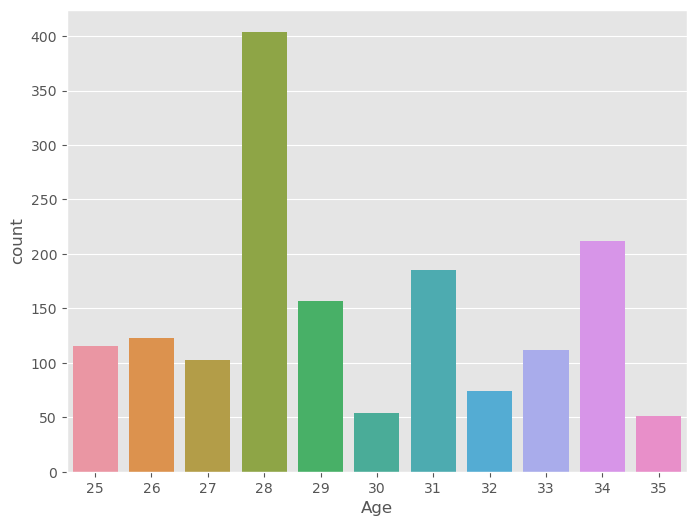

In [8]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df["Age"])

<AxesSubplot:xlabel='FamilyMembers', ylabel='count'>

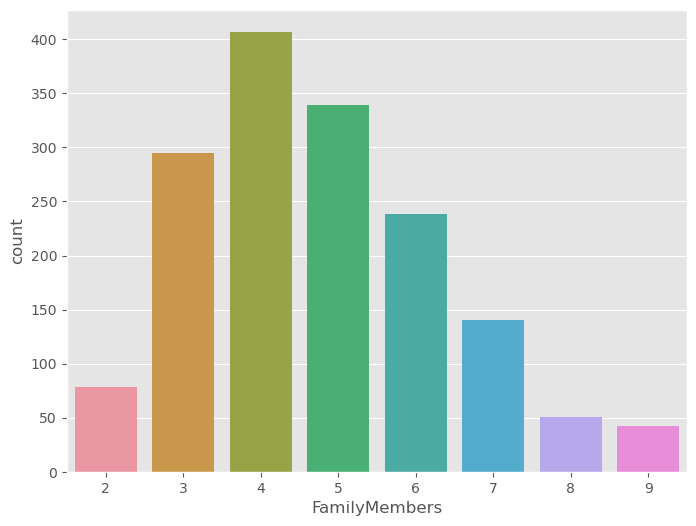

In [9]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df["FamilyMembers"])

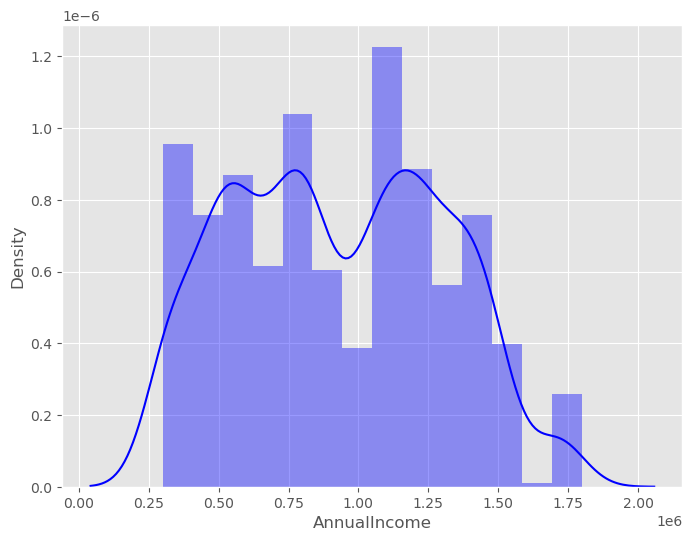

Mean: 928553.4591194969


In [10]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["AnnualIncome"], color="b")
plt.show()

mean = df['AnnualIncome'].mean()
print(f'Mean: {mean}')

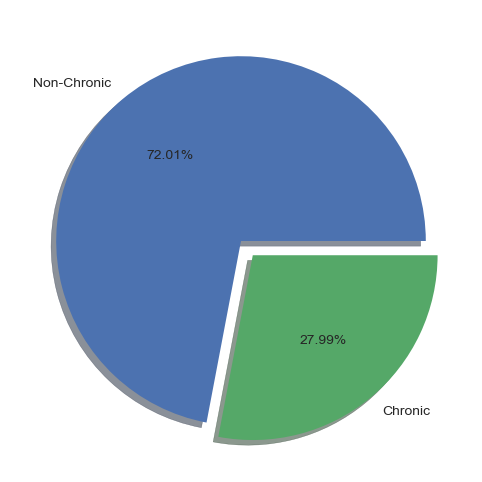

In [11]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["ChronicDiseases"].value_counts(),  
        labels=["Non-Chronic","Chronic"], 
        shadow = True, 
        explode = (0, 0.1),
        autopct='%.2f%%'
        )
plt.show()

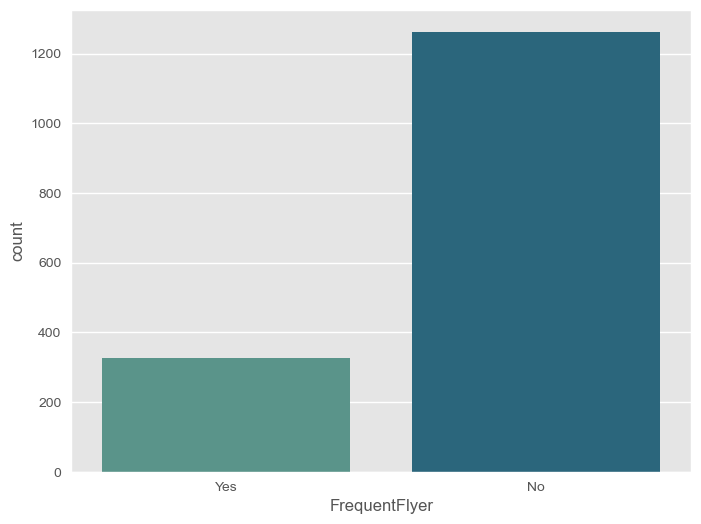

In [12]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x=df["FrequentFlyer"], palette="crest");

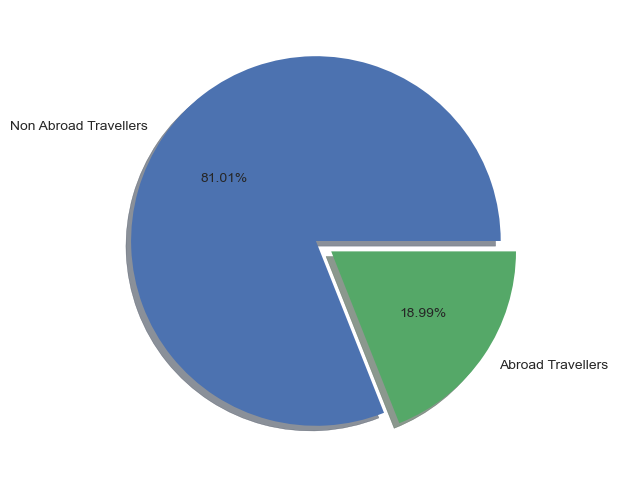

In [13]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["EverTravelledAbroad"].value_counts(), 
        labels=["Non Abroad Travellers","Abroad Travellers"], 
        shadow = True, 
        explode = (0, 0.1),
        autopct='%.2f%%'
        )
plt.show()

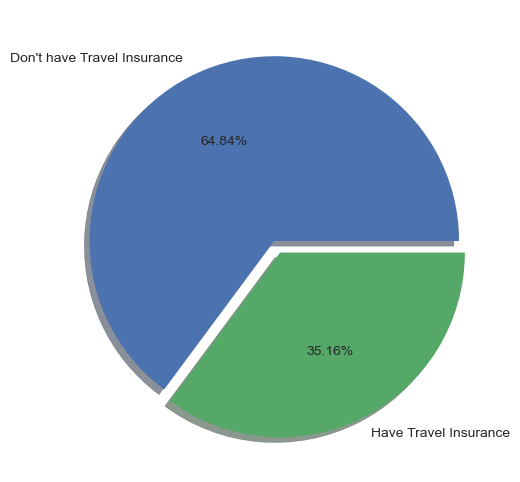

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["TravelInsurance"].value_counts(), 
        labels=["Don't have Travel Insurance","Have Travel Insurance"], 
        shadow = True, 
        explode = (0, 0.07),
        autopct='%.2f%%'
        )
plt.show()

e.

In [15]:
# Yes : 1 , No : 0
df['TravelInsurance'] = df['TravelInsurance'].map({'Yes': 1, 'No': 0})
df['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes': 1, 'No': 0})
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})

# Government Sector : 1, Private Sector/Self Employed : 0
df["Employment Type"] = df["Employment Type"].map({"Government Sector" : 1, "Private Sector/Self Employed" : 0})

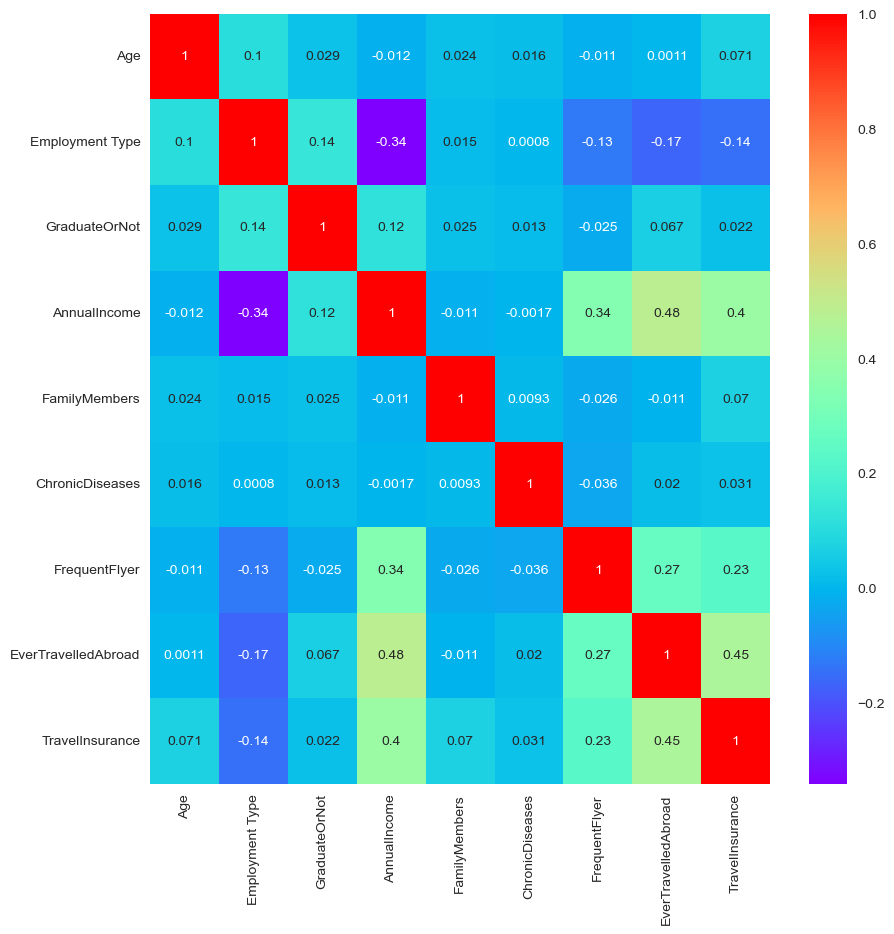

In [16]:
# Correlation Matrix

correlation_mat = df.corr()
corr_features = correlation_mat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df[corr_features].corr(),annot=True,cmap='rainbow')
plt.show()

f.

In [17]:
X = df.drop("TravelInsurance", axis=1)
X.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,34,0,1,1300000,6,0,1,0
1,28,0,1,750000,7,0,1,0
2,28,0,1,750000,6,0,1,0
3,32,1,1,800000,6,1,0,0
4,34,0,1,700000,4,1,0,0


In [18]:
y = df["TravelInsurance"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TravelInsurance, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=98)

In [20]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((1272, 8), (318, 8))

In [21]:
# Feature scaling

X_train.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
count,1272.000000,1272.000000,1272.000000,1.272000e+03,1272.000000,1272.000000,1272.000000,1272.000000
mean,29.591195,0.273585,0.867925,9.294025e+05,4.751572,0.282233,0.205189,0.187893
std,2.886990,0.445974,0.338706,3.766235e+05,1.607295,0.450263,0.403998,0.390780
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000
50%,29.000000,0.000000,1.000000,9.000000e+05,4.500000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000


In [22]:
sc = StandardScaler()
scaler = sc.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

g.

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
LogisticRegressionScore = lr.score(X_test,y_test)
LogisticRegressionScore

0.779874213836478

In [24]:
# Check for overfitting and underfitting

print("score on train data: ", lr.score(X_train, y_train))
print("score on test data: ", lr.score(X_test, y_test))

score on train data:  0.7720125786163522
score on test data:  0.779874213836478


<AxesSubplot:>

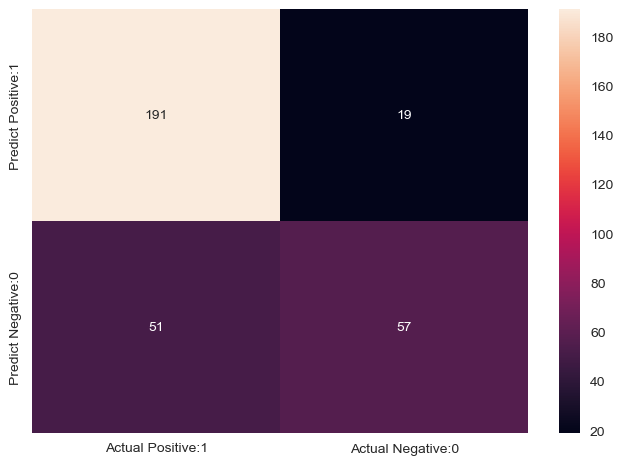

In [25]:
# Print the Confusion Matrix

cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

In [26]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       210
           1       0.75      0.53      0.62       108

    accuracy                           0.78       318
   macro avg       0.77      0.72      0.73       318
weighted avg       0.78      0.78      0.77       318



In [27]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [28]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('accuracy: ', classification_accuracy)

accuracy:  0.779874213836478


In [29]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification error: ',classification_error)

classification error:  0.22012578616352202


In [30]:
precision = TP / float(TP + FP)
print('precision: ', precision)

precision:  0.9095238095238095


In [31]:
recall = TP / float(TP + FN)
print('recall: ', recall)

recall:  0.7892561983471075


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 0.22012578616352202
Mean Squared Error: 0.22012578616352202
Root Mean Squared Error: 0.46917564532222045


In [33]:
clf = MLPClassifier(hidden_layer_sizes=(10, 5), random_state=98, max_iter=300)
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
MLPClassifierScore = accuracy_score(y_test,ypred)
MLPClassifierScore

0.8176100628930818

In [34]:
# Check for overfitting and underfitting

predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)
train_score = accuracy_score(predictions_train, y_train)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, y_test)
print("score on test data: ", test_score)

score on train data:  0.8207547169811321
score on test data:  0.8176100628930818


<AxesSubplot:>

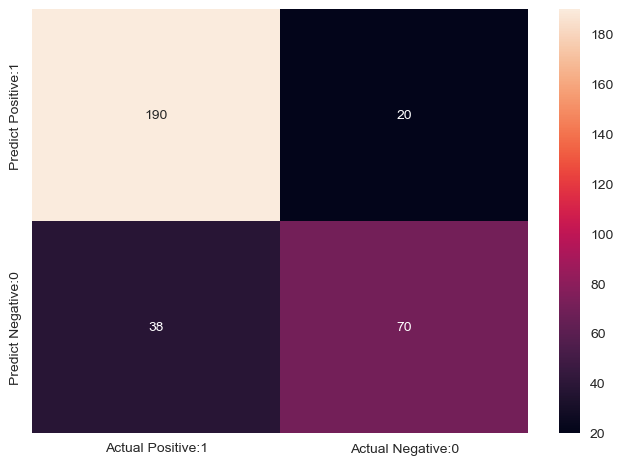

In [35]:
# Print the Confusion Matrix

cm = confusion_matrix(y_test, ypred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

In [36]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       210
           1       0.78      0.65      0.71       108

    accuracy                           0.82       318
   macro avg       0.81      0.78      0.79       318
weighted avg       0.81      0.82      0.81       318



In [37]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [38]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('accuracy: ', classification_accuracy)

accuracy:  0.8176100628930818


In [39]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification error: ',classification_error)

classification error:  0.18238993710691823


In [40]:
precision = TP / float(TP + FP)
print('precision: ', precision)

precision:  0.9047619047619048


In [41]:
recall = TP / float(TP + FN)
print('recall: ', recall)

recall:  0.8333333333333334


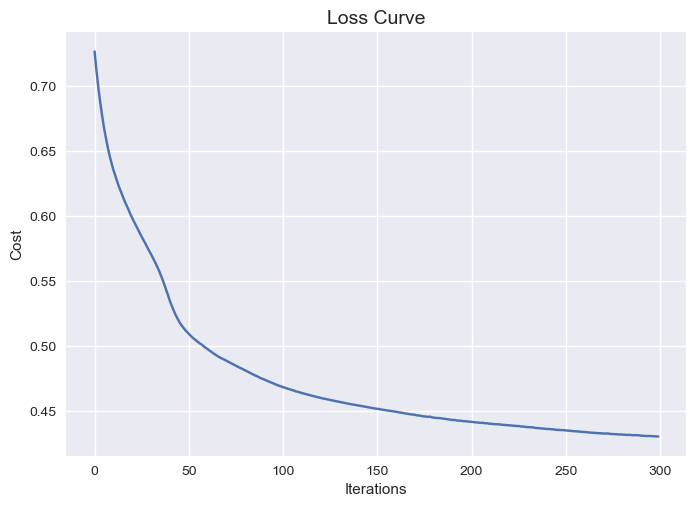

In [42]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [43]:
neurons =[(20, 15), (15,10), (12,8), (10,5)]
for activation in ['tanh', 'relu']:
    for neuron in neurons:
        mlp = MLPClassifier(hidden_layer_sizes=neuron, activation=activation, random_state=98, max_iter=500)
        mlp.fit(X_train,y_train)
        nn_predictions = mlp.predict(X_test)
        accuracy_test = accuracy_score(y_test, nn_predictions)
        nn_predictions = mlp.predict(X_train)
        accuracy_train = accuracy_score(y_train, nn_predictions)
        print(f"({activation}) neuron:{neuron}, accuracy_test:{accuracy_test}, accuracy_train:{accuracy_train}")

(tanh) neuron:(20, 15), accuracy_test:0.8018867924528302, accuracy_train:0.8474842767295597
(tanh) neuron:(15, 10), accuracy_test:0.8176100628930818, accuracy_train:0.8419811320754716
(tanh) neuron:(12, 8), accuracy_test:0.8113207547169812, accuracy_train:0.835691823899371
(tanh) neuron:(10, 5), accuracy_test:0.8113207547169812, accuracy_train:0.8333333333333334
(relu) neuron:(20, 15), accuracy_test:0.8081761006289309, accuracy_train:0.8553459119496856
(relu) neuron:(15, 10), accuracy_test:0.8113207547169812, accuracy_train:0.8372641509433962
(relu) neuron:(12, 8), accuracy_test:0.779874213836478, accuracy_train:0.835691823899371
(relu) neuron:(10, 5), accuracy_test:0.7924528301886793, accuracy_train:0.8238993710691824


Text(0, 0.5, 'Model Accuracy')

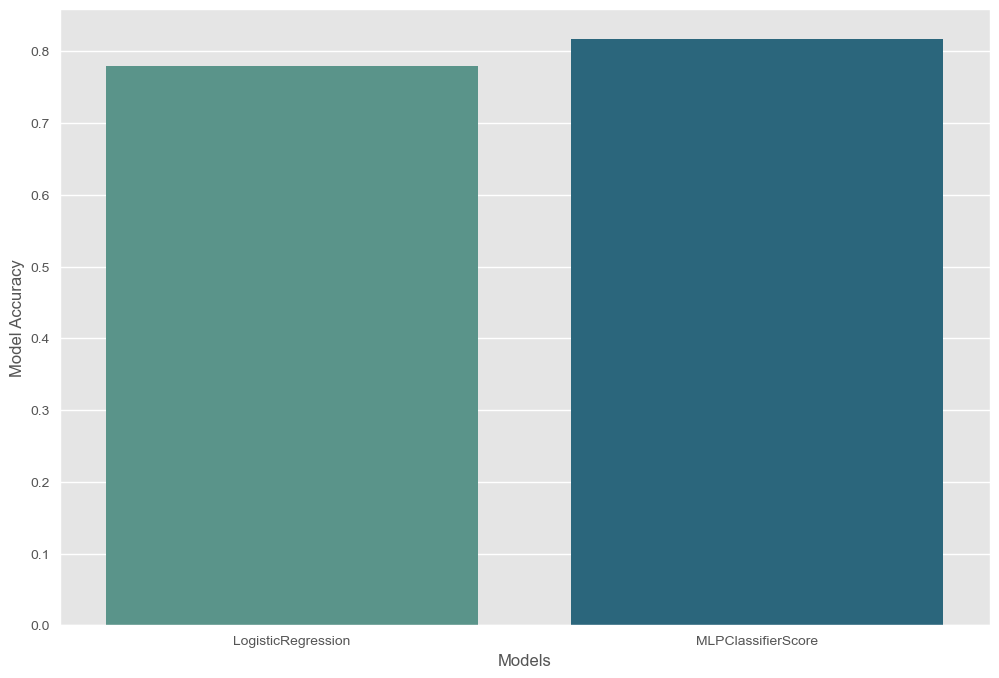

In [44]:
plt.style.use("ggplot")
x = ["LogisticRegression", "MLPClassifierScore"]

y = [LogisticRegressionScore, MLPClassifierScore]

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=x,y=y, palette="crest");
plt.xlabel("Models")
plt.ylabel("Model Accuracy")